In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [64]:
#File path
csv_file_path = '../Resources/Data/diabetes_012_health_indicators_BRFSS2015.csv'

#Load the csv file
df = pd.read_csv(csv_file_path)

#Display first fews rows
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [65]:
#Display column names
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [66]:
#Drop duplicates from the Dataframe
duplicates = df.drop_duplicates()

if "dupe" in duplicates.values:
    print("true")
else:
    print("False")

False


In [67]:
# Check for missing values
missing_values = df.isnull().sum()

# Get basic statistics for numerical features
data_statistics = df.describe()

missing_values, data_statistics

(Diabetes_012            0
 HighBP                  0
 HighChol                0
 CholCheck               0
 BMI                     0
 Smoker                  0
 Stroke                  0
 HeartDiseaseorAttack    0
 PhysActivity            0
 Fruits                  0
 Veggies                 0
 HvyAlcoholConsump       0
 AnyHealthcare           0
 NoDocbcCost             0
 GenHlth                 0
 MentHlth                0
 PhysHlth                0
 DiffWalk                0
 Sex                     0
 Age                     0
 Education               0
 Income                  0
 dtype: int64,
         Diabetes_012         HighBP       HighChol      CholCheck  \
 count  253680.000000  253680.000000  253680.000000  253680.000000   
 mean        0.296921       0.429001       0.424121       0.962670   
 std         0.698160       0.494934       0.494210       0.189571   
 min         0.000000       0.000000       0.000000       0.000000   
 25%         0.000000       0.000000     

In [68]:
# Define features and target variable
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

In [69]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
# Reduce dataset size for training (subset of 10,000 rows to avoid memory issues)
subset_size = 10000
X_train_small = X_train_scaled[:subset_size]
y_train_small = y_train[:subset_size]

In [71]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_small, y_train_small)

GaussianNB()

In [72]:
# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled[:subset_size])

In [73]:
# Evaluate the model
accuracy_nb = accuracy_score(y_test[:subset_size], y_pred_nb)
classification_rep_nb = classification_report(y_test[:subset_size], y_pred_nb, output_dict=True)

# Extract performance metrics
precision = [classification_rep_nb[str(float(i))]["precision"] for i in range(3)]
recall = [classification_rep_nb[str(float(i))]["recall"] for i in range(3)]
f1_score = [classification_rep_nb[str(float(i))]["f1-score"] for i in range(3)]

In [74]:
# Prepare for visualization
class_labels = ["No Diabetes (0)", "Pre-Diabetes (1)", "Diabetes (2)"]

C:\Users\kelvi\AppData\Local\Temp\ipykernel_17964\1130965960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=precision, palette="Blues")


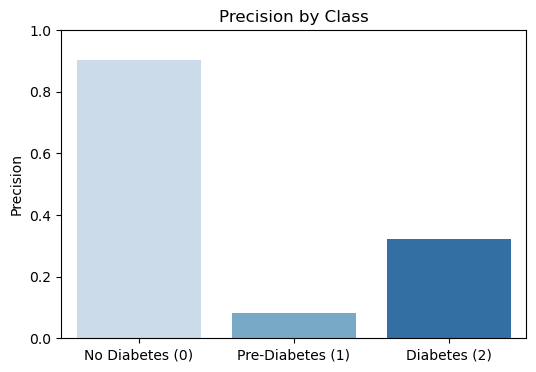

In [75]:
plt.figure(figsize=(6, 4))
sns.barplot(x=class_labels, y=precision, palette="Blues")
plt.title("Precision by Class")
plt.ylim(0, 1)
plt.ylabel("Precision")
plt.show()

C:\Users\kelvi\AppData\Local\Temp\ipykernel_17964\2646925587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=recall, palette="Greens")


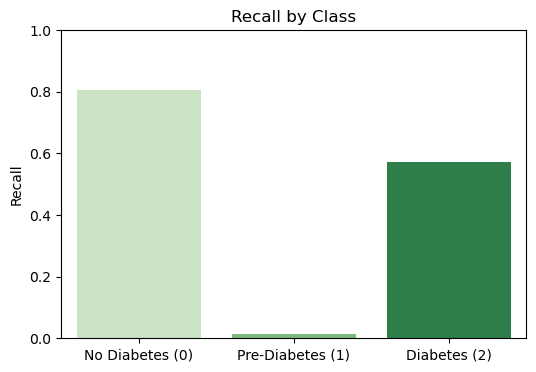

In [76]:
# Plot Recall separately
plt.figure(figsize=(6, 4))
sns.barplot(x=class_labels, y=recall, palette="Greens")
plt.title("Recall by Class")
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.show()

C:\Users\kelvi\AppData\Local\Temp\ipykernel_17964\4043924831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=f1_score, palette="Reds")


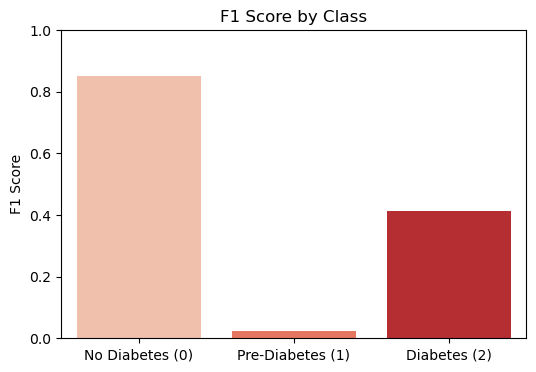

In [77]:
# Plot F1 Score separately
plt.figure(figsize=(6, 4))
sns.barplot(x=class_labels, y=f1_score, palette="Reds")
plt.title("F1 Score by Class")
plt.ylim(0, 1)
plt.ylabel("F1 Score")
plt.show()

In [78]:
# Rename target column for clarity
df.rename(columns={'Diabetes_012': 'DiabetesStatus'}, inplace=True)


C:\Users\kelvi\AppData\Local\Temp\ipykernel_17964\4067401308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['DiabetesStatus'], palette='coolwarm')


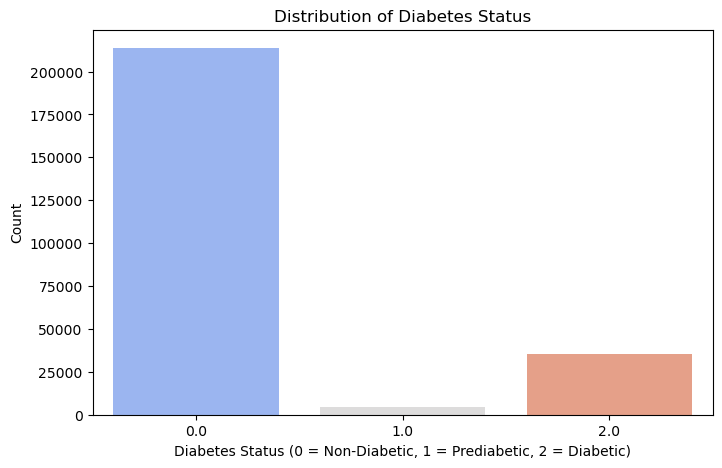

In [79]:
# Plot the distribution of diabetes status
plt.figure(figsize=(8, 5))
sns.countplot(x=df['DiabetesStatus'], palette='coolwarm')
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status (0 = Non-Diabetic, 1 = Prediabetic, 2 = Diabetic)')
plt.ylabel('Count')
plt.show()

In [80]:
# Compute the correlation matrix
correlation = df.corr()

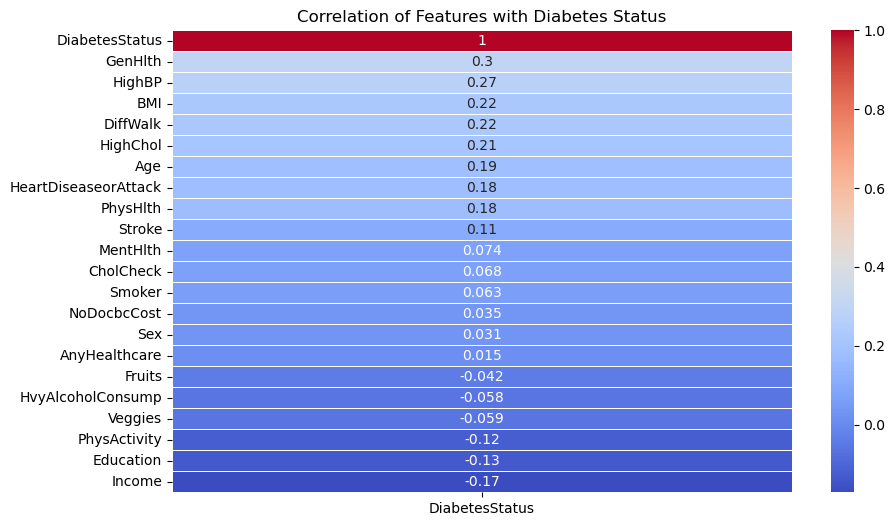

In [ ]:
# Plot the heatmap of feature correlations with DiabetesStatus
plt.figure(figsize=(10, 6))
sns.heatmap(correlation[['DiabetesStatus']].sort_values(by='DiabetesStatus', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Diabetes Status')
plt.show()

C:\Users\kelvi\AppData\Local\Temp\ipykernel_17964\1824753771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DiabetesStatus', y='BMI', data=df, palette='coolwarm')


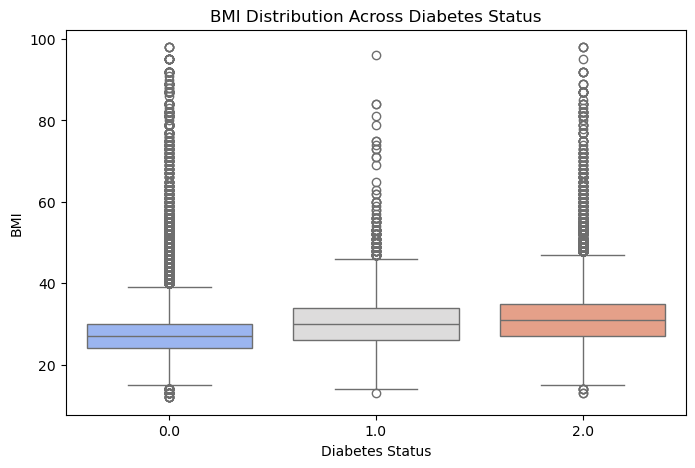

In [82]:
# Boxplot of BMI across Diabetes Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='DiabetesStatus', y='BMI', data=df, palette='coolwarm')
plt.title('BMI Distribution Across Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

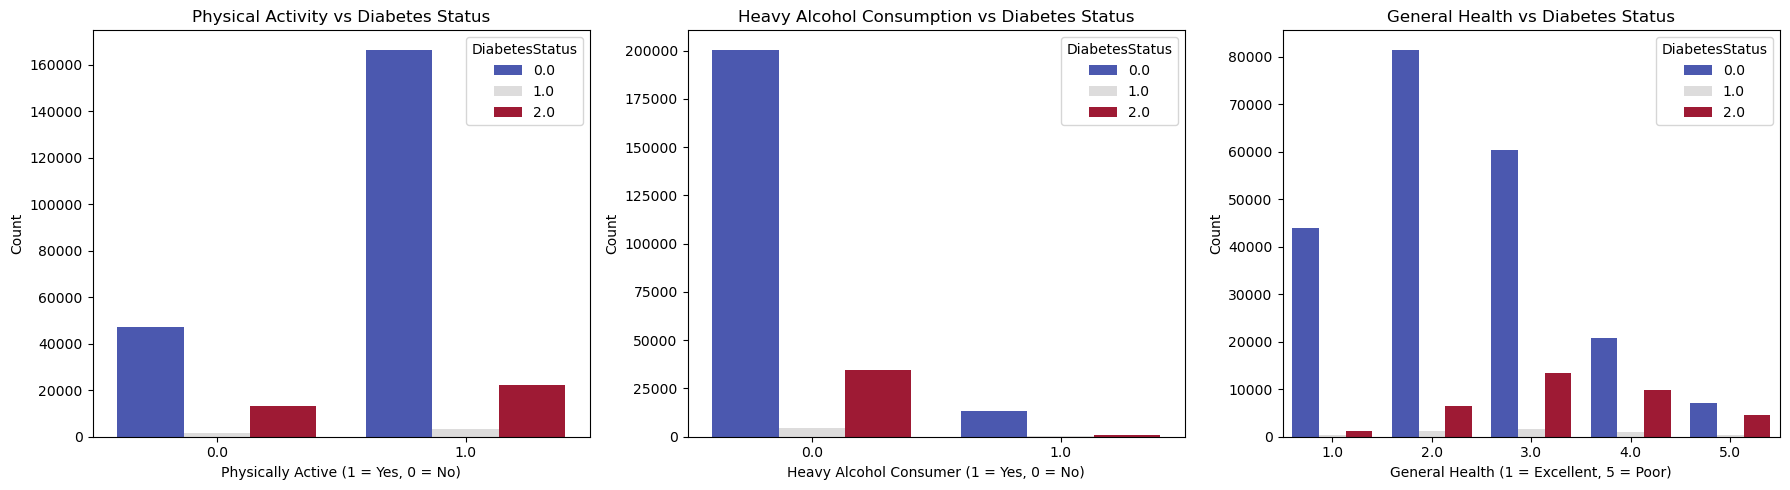

In [85]:
# Plot comparisons of physical activity, alcohol consumption, and general health among diabetes groups
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Physical Activity
sns.countplot(x='PhysActivity', hue='DiabetesStatus', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Physical Activity vs Diabetes Status')
axes[0].set_xlabel('Physically Active (1 = Yes, 0 = No)')
axes[0].set_ylabel('Count')

# Heavy Alcohol Consumption
sns.countplot(x='HvyAlcoholConsump', hue='DiabetesStatus', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('Heavy Alcohol Consumption vs Diabetes Status')
axes[1].set_xlabel('Heavy Alcohol Consumer (1 = Yes, 0 = No)')
axes[1].set_ylabel('Count')

# General Health
sns.countplot(x='GenHlth', hue='DiabetesStatus', data=df, palette='coolwarm', ax=axes[2])
axes[2].set_title('General Health vs Diabetes Status')
axes[2].set_xlabel('General Health (1 = Excellent, 5 = Poor)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

